In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [3]:
print('Data shape:', df.shape)
print('\nThe first 5 rows:\n', df.head())

print('NAN Value in each columns', df.isna().sum())

Data shape: (302, 14)

The first 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   4       160   286    0        2      108      1      1.5      2   
1   67    1   4       120   229    0        2      129      1      2.6      2   
2   37    1   3       130   250    0        0      187      0      3.5      3   
3   41    0   2       130   204    0        2      172      0      1.4      1   
4   56    1   2       120   236    0        0      178      0      0.8      1   

    ca  thal  target  
0  3.0   3.0       2  
1  2.0   7.0       1  
2  0.0   3.0       0  
3  0.0   3.0       0  
4  0.0   3.0       0  
NAN Value in each columns age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


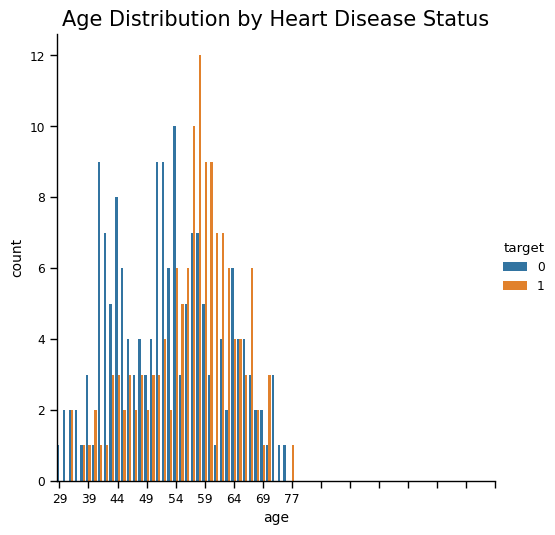

In [4]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

sns.set_context('paper', font_scale = 1, rc = {"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=sorted(df['age'].unique()))
ax.ax.set_xticks(np.arange(0,80,5))
plt.title('Age Distribution by Heart Disease Status')
plt.show()

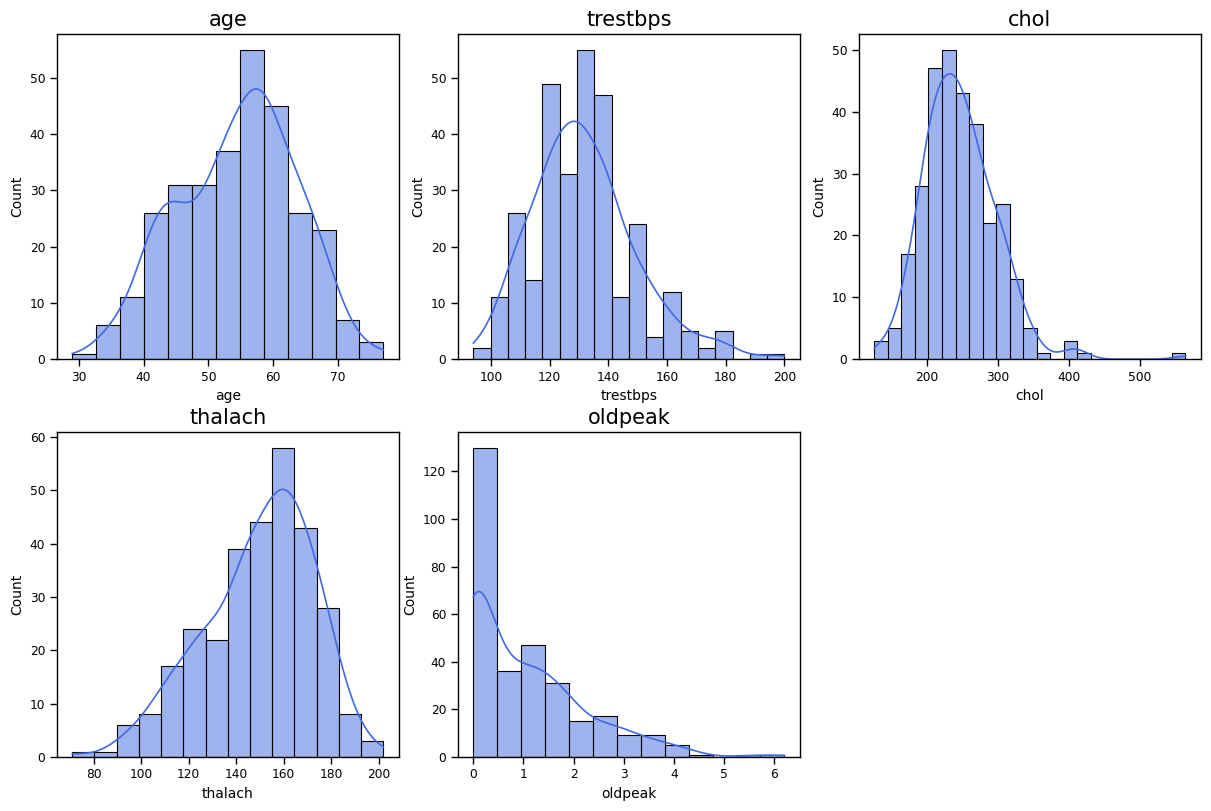

In [5]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color='royalblue')
    plt.title(col)

plt.tight_layout()
plt.show()


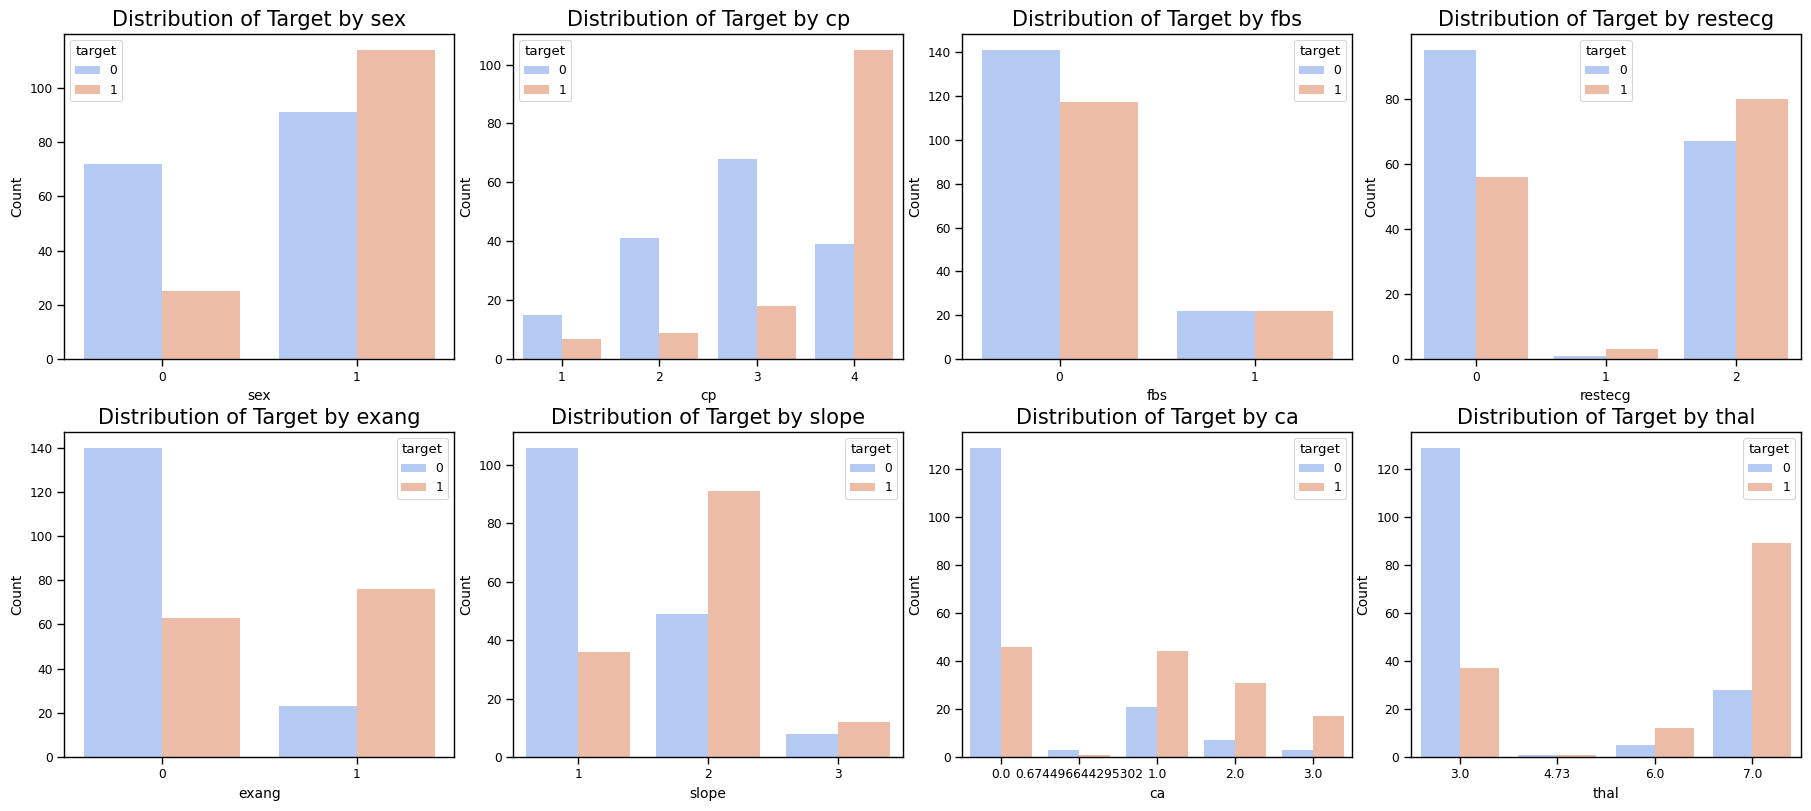

In [6]:
n = len(categorical_cols)

fig , ax = plt.subplots(2, 4, figsize = (18,8))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=col, hue='target', palette='coolwarm')
    plt.title(f'Distribution of Target by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()